In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/sample_submission.csv
/kaggle/input/dataset/train.csv
/kaggle/input/dataset/test.csv


In [2]:
#importing essential libaries
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn import feature_extraction, linear_model, model_selection, naive_bayes, ensemble

In [3]:
#loading data
train_df = pd.read_csv('../input/dataset/train.csv')
test_df = pd.read_csv('../input/dataset/test.csv')

In [4]:
#reading information of training dataset
train_df.info

<bound method DataFrame.info of          id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...

In [5]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [6]:
#reading information of testing dataset
test_df.info

<bound method DataFrame.info of          id keyword location  \
0         0     NaN      NaN   
1         2     NaN      NaN   
2         3     NaN      NaN   
3         9     NaN      NaN   
4        11     NaN      NaN   
...     ...     ...      ...   
3258  10861     NaN      NaN   
3259  10865     NaN      NaN   
3260  10868     NaN      NaN   
3261  10874     NaN      NaN   
3262  10875     NaN      NaN   

                                                   text  
0                    Just happened a terrible car crash  
1     Heard about #earthquake is different cities, s...  
2     there is a forest fire at spot pond, geese are...  
3              Apocalypse lighting. #Spokane #wildfires  
4         Typhoon Soudelor kills 28 in China and Taiwan  
...                                                 ...  
3258  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...  
3259  Storm in RI worse than last hurricane. My city...  
3260  Green Line derailment in Chicago http://t.co/U...  
326

In [7]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [8]:
#sum of all null values in each column of training dataset, in descending order
train_df.isnull().sum().sort_values(ascending = False)

location    2533
keyword       61
id             0
text           0
target         0
dtype: int64

In [9]:
#We can see a lots of null values for "keyword" and "location" columns

In [10]:
#exploratory data analysis (EDA)

In [11]:
# check class distribution

print("No. of Real Disaster Tweets (Target = 1):",len(train_df[train_df["target"]==1]))
print("No. of Fake Disaster Tweets (Target = 0):",len(train_df[train_df["target"]==0]))

No. of Real Disaster Tweets (Target = 1): 3271
No. of Fake Disaster Tweets (Target = 0): 4342


In [12]:
# function to draw histogram
def draw_hist(xlabel, ylabel,title,target,sub,color):
    plt.subplot(1,2,sub)
    plt.hist(train_df[train_df.target==target]["length"],color = color)
    plt.title(title,fontsize=25)
    plt.xlabel(xlabel,fontsize=15)
    plt.ylabel(ylabel,fontsize=15)
    plt.ylim(0,1200)
    plt.grid()

In [13]:
# we will now check the length of "real disaster" vs lenght of "fake disaster" tweets
# lets first add a new field to the dataset called "length"
def length(text):    
    return len(text)

train_df["length"]= train_df.text.apply(length)

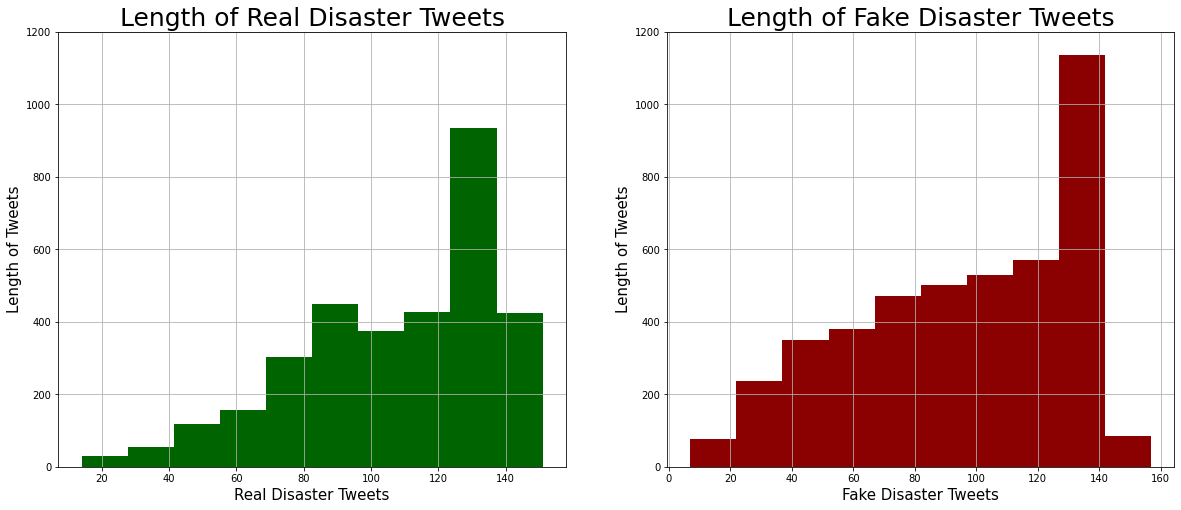

In [14]:
# lets see the distribution of length of tweets real vs fake

plt.figure(figsize = (20,8))
draw_hist("Real Disaster Tweets","Length of Tweets","Length of Real Disaster Tweets",1, 1,"darkgreen")
draw_hist("Fake Disaster Tweets","Length of Tweets","Length of Fake Disaster Tweets",0, 2,"darkred")

In [15]:
#training dataset with added length column
train_df

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,83
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,125
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,65
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,137


In [16]:
# lets drop the column
train_df.drop("length",1,inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [17]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [18]:
#preprocessing

In [19]:
#dropping the 2 columns that contain null values (keyword and location)
train_df=train_df.drop('keyword',axis=1)
train_df=train_df.drop('location',axis=1)

In [20]:
#we will remove any urls/links in the column "text"
def remove_urls(text):
    text = re.sub(r"(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*","",text)
    return text

train_df["text"] = train_df["text"].apply(lambda x: remove_urls(x))
test_df["text"]=test_df["text"].apply(lambda x: remove_urls(x))


train_df.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [21]:
#converting all string values to lower case letters in text column of tarining dataset
train_df['text'] = train_df['text'].str.lower()
test_df['text'] = test_df['text'].str.lower()
train_df.head()

,id,text,target
0,1,our deeds are the reason of this #earthquake m...,1
1,4,forest fire near la ronge sask. canada,1
2,5,all residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,just got sent this photo from ruby #alaska as ...,1


In [22]:
def extract_words(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

train_df['text'] = train_df['text'].apply(lambda text: extract_words(text))
test_df['text'] = test_df['text'].apply(lambda text: extract_words(text))
train_df.head()

,id,text,target
0,1,our deeds are the reason of this earthquake ma...,1
1,4,forest fire near la ronge sask canada,1
2,5,all residents asked to shelter in place are be...,1
3,6,people receive wildfires evacuation orders in...,1
4,7,just got sent this photo from ruby alaska as s...,1


In [23]:
# removing punctuation from the tweets
p = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', p))

train_df["text"] = train_df["text"].apply(lambda text: remove_punctuation(text))
test_df["text"] = test_df["text"].apply(lambda text: remove_punctuation(text))
train_df.head()

,id,text,target
0,1,our deeds are the reason of this earthquake ma...,1
1,4,forest fire near la ronge sask canada,1
2,5,all residents asked to shelter in place are be...,1
3,6,people receive wildfires evacuation orders in...,1
4,7,just got sent this photo from ruby alaska as s...,1


In [24]:
# removing stopwords
def remove_stopwords(text):
    return ' '.join([word for word in str(text).split() if word not in stopwords.words('english')])

train_df['text'] = train_df['text'].apply(lambda text: remove_stopwords(text))
test_df['text'] = test_df['text'].apply(lambda text: remove_stopwords(text))
train_df.head()

,id,text,target
0,1,deeds reason earthquake may allah forgive us,1
1,4,forest fire near la ronge sask canada,1
2,5,residents asked shelter place notified officer...,1
3,6,people receive wildfires evacuation orders cal...,1
4,7,got sent photo ruby alaska smoke wildfires pou...,1


In [25]:
# lemmaizing the words
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

train_df['text'] = train_df['text'].apply(lambda text: lemmatize_words(text))
test_df['text'] = test_df['text'].apply(lambda text: lemmatize_words(text))
train_df.head()

,id,text,target
0,1,deed reason earthquake may allah forgive u,1
1,4,forest fire near la ronge sask canada,1
2,5,resident asked shelter place notified officer ...,1
3,6,people receive wildfire evacuation order calif...,1
4,7,got sent photo ruby alaska smoke wildfire pour...,1


In [26]:
# tfidf_count_vectorizer = feature_extraction.text.TfidfVectorizer()

In [27]:
# train_vectors = tfidf_count_vectorizer.fit_transform(train_df['text'])
# test_vectors = tfidf_count_vectorizer.transform(test_df['text'])

In [28]:
count_vectorizer = feature_extraction.text.CountVectorizer()

In [29]:
train_vectors = count_vectorizer.fit_transform(train_df['text'])
test_vectors = count_vectorizer.transform(test_df['text'])

In [30]:
# nb>lr>rc>rf (scores)

In [31]:
rc = linear_model.RidgeClassifier()

In [32]:
lr = linear_model.LogisticRegression()

In [33]:
nb = naive_bayes.MultinomialNB()

In [34]:
rf = ensemble.RandomForestClassifier(n_estimators=100)

In [35]:
scores = model_selection.cross_val_score(nb, train_vectors, train_df['target'], cv=3, scoring='f1')
scores

array([0.67419962, 0.6523266 , 0.72003353])

In [36]:
nb.fit(train_vectors, train_df["target"])

MultinomialNB()

In [37]:
sample_submission = pd.read_csv("../input/dataset/sample_submission.csv")

In [38]:
sample_submission["target"] = nb.predict(test_vectors)

In [39]:
sample_submission.to_csv("submission.csv", index=False)